# utils.data简介
torch.utils.data工具包包括：Dataset, DataLoader, random_split, sampler

## data.Dataset()
此类有两个方法_getitem_和_len_。是一个抽象的类（其方法都要被覆盖过），其他数据集都继承自这个类，并且要覆盖写以上两个方法。

### 导入需要的模块

In [1]:
import torch
from torch.utils import data
import numpy as np

### 定义获取数据集的类

In [2]:
#下面括号中的data.Dataset表示TestDataset继承自data.Dataset。任何数据集都要继承自这个类。
class TestDataset(data.Dataset):
    #覆盖初始化函数
    #Data.Dataset类的初始化函数有两个参数一个是self.Data表示数据,
    #一个是self.Label表示数据对应的标签。
    def __init__(self):
        self.Data=np.asarray([[1,2],[3,4],[2,1],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5]])
        self.Label=np.asarray([0,1,0,1,2,2,1,2,2])
    #覆盖_getitem_方法，此方法有一个输入参数index，也就是索引。
    #注意torch.from_numpy和torch.Tensor都可以将numpy转化成tensor。
    #但是torch.tensor可能会牺牲精度，torch.from_numpy会保持原来的数据类型（更加安全）。
    def __getitem__ (self,index):
        txt=torch.from_numpy(self.Data[index])#也可以用torch.tensor。
        label=torch.tensor(self.Label[index])#不可用torch.from_numpy 
        return txt,label
    #_覆盖_len_方法，返回数据集中的数据个数
    #len(对象)返回对象的长度  
    def __len__(self):
        return len(self.Data)
    



### 获取数据集中的数据

In [3]:
#将上一个代码块定义的Test.Dataset类实例化为Test。
Test = TestDataset()


#调用_getitem_方法，由于只有__getitem__方法有传入参数（2），故默认调用__getitem__方法，并将返回值txt和label输出。
print(Test[2])

#调用_len_方法，并将返回值len(self.Data)输出。
print(Test.__len__())

(tensor([2, 1], dtype=torch.int32), tensor(0, dtype=torch.int32))
9


##    data.DataLoader（）
1.1中data.Dataset只负责数据的抽取，调用__getitem__一次只返回一个样本。如果希望批处理（batch_size)，还要同时shuffle和并行加速等操作可选择data.DataLoader()。

In [4]:
#四个参数分别为：加载的数据集、批处理个数、是否将数据打乱、使用多进程加载的进程数。
#注意test_loader是torch.utils.data.dataloader.DataLoader类型的变量
#test_loader会将整个数据集以batch_size的批量分割
test_loader = data.DataLoader(Test,batch_size=3,shuffle=False,num_workers=0)
print(test_loader)

print(len(test_loader))


3


### 一次提取一个小批量

In [5]:
#用enumerate。
#注意下面的i表示第几个batch，由0开始。traindata包括此batch的数据和标签
for i,traindata in enumerate(test_loader):
    print('i:',i)
    Data,Label=traindata
    print('data:',Data)
    print('Label:',Label)

i: 0
data: tensor([[1, 2],
        [3, 4],
        [2, 1]], dtype=torch.int32)
Label: tensor([0, 1, 0], dtype=torch.int32)
i: 1
data: tensor([[3, 4],
        [4, 5],
        [4, 5]], dtype=torch.int32)
Label: tensor([1, 2, 2], dtype=torch.int32)
i: 2
data: tensor([[4, 5],
        [4, 5],
        [4, 5]], dtype=torch.int32)
Label: tensor([1, 2, 2], dtype=torch.int32)


### 使用迭代器提取

In [6]:
#iter()函数
dataiter=iter(test_loader)
imags,label=next(dataiter)
print('imags=',imags)
print(label)


imags,label=next(dataiter)
print('imags=',imags)
print(label)


imags,label=next(dataiter)
print('imags=',imags)
print(label)
#容易看出可以达到和enumerate一样的效果

imags= tensor([[1, 2],
        [3, 4],
        [2, 1]], dtype=torch.int32)
tensor([0, 1, 0], dtype=torch.int32)
imags= tensor([[3, 4],
        [4, 5],
        [4, 5]], dtype=torch.int32)
tensor([1, 2, 2], dtype=torch.int32)
imags= tensor([[4, 5],
        [4, 5],
        [4, 5]], dtype=torch.int32)
tensor([1, 2, 2], dtype=torch.int32)


# torchvision简介
有四个功能模块：model、datasets、transforms和utils。
本节主要介绍datasets的ImageFolder和tansforms

## transforms


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
transforms.Compose([
    #将给定的 PIL.Image 进行中心切割，得到给定的 size，
    #size 可以是 tuple，(target_height, target_width)。
    #size 也可以是一个 Integer，在这种情况下，切出来的图片形状是正方形。            
    transforms.CenterCrop(10),#切出一个10X10的正方形

    
    #切割中心点的位置随机选取
    transforms.RandomCrop(20, padding=0),#中心位置为坐标为（20，20）的点
    
    #把一个取值范围是 [0, 255] 的 PIL.Image 或者 shape 为 (H, W, C) 的 numpy.ndarray，
    #转换为形状为 (C, H, W)，取值范围是 [0, 1] 的 torch.FloatTensor
    transforms.ToTensor(),
    
    #规范化到[-1,1]
    #具体地说，对每个通道而言，Normalize执行以下操作：image=(image-mean)/std
    #原来的0-1最小值0则变成(0-0.5)/0.5=-1，而最大值1则变成(1-0.5)/0.5=1.
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
])

Compose(
    CenterCrop(size=(10, 10))
    RandomCrop(size=(20, 20), padding=0)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

## ImageFolder
主要用于处理自定义数据集

In [9]:
from torchvision import transforms,utils,datasets
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 将预处理方式给到my_trans

In [10]:
my_trans=transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

### datasets.ImageFolder将目录中的文件夹名自动转化成序列

In [11]:
train_data = datasets.ImageFolder('D:\学习文件\论文、python、笔记\jupyter\Pytorch练习',transform=my_trans)

### 之后再用data.DataLoader载入时标签自动就是整数序列了

In [12]:
train_loader = data.DataLoader(train_data,batch_size=8,shuffle=True)

### 提取第一个batch

tensor([1, 1, 1, 1, 1, 1, 1, 1])
(3, 228, 1810)


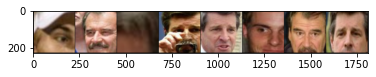

In [20]:
#utils.make_grid能将多张图片拼接在一起
#utils.save_image能将Tensor保存成图片

for i_batch,img in enumerate(train_loader):
    if i_batch==0:
        #输出i_batch=0时对应的标签。
        #注意img[0]表示数据，img[1]表示标签（batch_size=8所以有八个标签）。
        print(img[1])
        
        #将数据img[0]（含有8张图片）拼接到一起
        grid=utils.make_grid(img[0])
        
        #将拼接好的图像保存，并命名为test01.png。
        utils.save_image(grid,'../数据/练习二（拼接图像）/test01.png')
        
        #一个图像是3x224x224八个图像由于有padding默认=2，则
        #通道数3不变，宽变为224+2*2=228，长变为224*8+2*9=1810
        print(grid.numpy().shape)
        
        #plt.imshow()函数负责对图像进行处理，并显示其格式，但是不能显示。
        #其后跟着plt.show()才能显示出来。
        
        #plt.imshow在现实的时候输入的是（imagesize,imagesize,channels）
        #而grid.numpy()是（channels,imagesize,imagesize）
        #所以用transpose转化成（imagesize,imagesize,channels）
        plt.imshow(grid.numpy().transpose((1,2,0)))
        plt.show()      
    break

### 打开test01.png文件

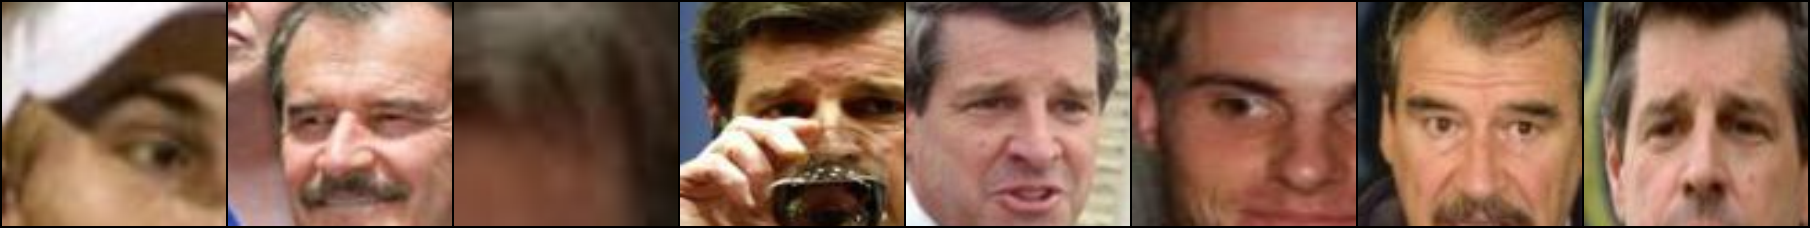

In [21]:
#导入显示模块
from PIL import Image
#用方法open显示图像
Image.open('../数据/练习二（拼接图像）/test01.png')

# 可视化工具：tendorboardX

## 用tensorboardX可视化神经网络

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [ ]:
from tensorboardX import SummaryWriter

### 定义网络

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #第一个卷积层（二维的卷积核）
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        
        #第二个卷积层（二维的卷积核）
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        
        #在第二个卷积层加入dropout
        self.conv2_drop = nn.Dropout2d()
        
        #第一个全连接层
        self.fc1 = nn.Linear(320,50)
        
        #第二个全连接层
        self.fc2 = nn.Linear(50,10)
        
        #批量归一化
        self.bn = nn.BatchNorm2d(20)
    def forward(self,x):
        
        #第一层卷积层之后加入最大池化层
        x = F.max_pool2d(self.conv1(x), 2)
        
        #第一层卷积层
        x = F.relu(x) + F.relu(-x)#########
        
        #第二层卷积层用dropout+最大池化层，激活函数用relu，最后批量归一化层
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        
        x = x.view(-1, 320)#######
        
        x = F.relu(self.fc1(x))#############
        x = F.dropout(x, training=self.training)######
        
        
        x = self.fc2(x)############
        x = F.softmax(x, dim=1)#################
        return x

NameError: name 'nn' is not defined

### 定义输入

In [ ]:
input = torch.rand(32,1,28,28)

### 实例化神经网络

In [ ]:
model = Net()

### 将model保存为graph

In [ ]:
with SummaryWriter(log_dir='D:\学习文件\论文、python、笔记\jupyter\Pytorch练习\数据\练习二（可视化神经网络）',comment='Net') as w:
    w.add_graph(model, (input, ))

## 用tensorboardX可视化损失值

In [15]:
import torch
import numpy as np
import torch.nn as nn
from tensorboardX import SummaryWriter 

In [16]:
input_size = 1
output_size = 1
num_epoches = 60
learning_rate = 0.01

In [17]:
dtype = torch.FloatTensor
writer = SummaryWriter(log_dir='D:\学习文件\论文、python、笔记\jupyter\Pytorch练习\数据\练习二（可视化损失）',comment='Linear')

np.random.seed(100)
x_train = np.linspace(-1,1,100).reshape(100,1)
y_train = 3*np.power(x_train,2)+2+0.2*np.random.rand(x_train.size).reshape(100,1)

model = nn.Linear(input_size,output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range (num_epoches):
    inputs = torch.from_numpy(x_train).type(dtype)
    targets = torch.from_numpy(y_train).type(dtype)
    
    output = model(inputs)
    loss = criterion(output,targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    writer.add_scalar('训练损失',loss,epoch)#loss随着epoch增大而减小

## 用tensorboardX可视化特征图

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
from tensorboardX import SummaryWriter

In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='../数据/CIFAR10', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../数据/CIFAR10', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# torchvision.utils.make_grid()参数